<a href="https://colab.research.google.com/github/RoshanM-18/Intermediate-Deep-Learning-projects-using-Tensorflow-Keras/blob/main/Chatbot_using_TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-a1b0ab1e-132f-bc65-9a2f-4bb43ae770d2)


#### Importing the required libraries and downloading the dataset from Kaggle

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

import tensorflow as tf
from tensorflow import keras

import os
import shutil
import zipfile
import random
import time
import string
import sys

In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content"

In [ ]:
!chmod 600 "/content/kaggle.json"

In [ ]:
!kaggle datasets download -d tovarischsukhov/southparklines

  0% 0.00/1.81M [00:00<?, ?B/s]
100% 1.81M/1.81M [00:00<00:00, 60.0MB/s]


In [ ]:
zip_ref = zipfile.ZipFile("/content/southparklines.zip")
zip_ref.extractall()
zip_ref.close()

#### Reading the dataset and performing some basic EDA 

In [ ]:
df = pd.read_csv("/content/All-seasons.csv")
df.head()

,Season,Episode,Character,Line
0,10,1,Stan,"You guys, you guys! Chef is going away. \n"
1,10,1,Kyle,Going away? For how long?\n
2,10,1,Stan,Forever.\n
3,10,1,Chef,I'm sorry boys.\n
4,10,1,Stan,"Chef said he's been bored, so he joining a gro..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70896 entries, 0 to 70895
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Season     70896 non-null  object
 1   Episode    70896 non-null  object
 2   Character  70896 non-null  object
 3   Line       70896 non-null  object
dtypes: object(4)
memory usage: 2.2+ MB


In [ ]:
df.columns = [x.lower() for x in df.columns]

In [ ]:
dialogues = df.line.tolist()

In [ ]:
dialogues[105:145]

["Well look: he spent the last three months with that adventurers' club. Maybe they know what happened to him.\n",
 '(Yeah! I think...)\n',
 'Yeah!\n',
 'All right, come on guys!\n',
 "Hey you guys, you know what they call a Jewish woman's boobs? Jewbs. \n",
 'May I help you.\n',
 'Ahh, hi, can we speak to the head guy or something?\n',
 'Right this way. \n',
 "Now, the upper rim of Kilimanjaro should be quite a trek, and so we'll need to have a-\n",
 'Excuse me, sir. These boys wanted to speak with you.\n',
 "Ahh yes, splendid! Good afternoon, lads! I'm Head Adventurer William P. Connolly, Esquire! Welcome, to the Super Adventure Club!\n",
 'Tally ho!\n',
 'Indeed!\n',
 'Uh, hi. Our friend joined your club a while back, and now he wants to molest kids. \n',
 "What? Well... well yes, of course! That's what the Super Adventure Club does!\n",
 '...Huh?\n',
 'We travel the world and have sex with children!\n',
 'Yes, what else would we do?\n',
 'Well, we thought you went exploring and lik

#### Text preprocessing

In [ ]:
def clean_text(text):

  text = text.lower()

  text = re.sub(r"\n", "", text)
  text = re.sub(r"[-()]", "", text)
  text = re.sub(r"\.", " .", text)
  text = re.sub(r"\!", " !", text)
  text = re.sub(r"\,", " ,", text)
  text = re.sub(r"\?", " ?", text)
  text = re.sub(r"-", " ", text)
  text = re.sub(r":", "", text)
  text = re.sub(r"let's", "let us", text)
  text = re.sub(r"ma'am", "madam", text)
  text = re.sub(r"i'm", "i am", text)
  text = re.sub(r"that's", "that is", text)
  text = re.sub(r"what's", "what is", text)
  text = re.sub(r"he's", "he is", text)
  text = re.sub(r"she's", "she is", text)
  text = re.sub(r"it's", "it is", text)
  text = re.sub(r"won't", "will not", text)
  text = re.sub(r"can't", "cannot", text)
  text = re.sub(r"don't", "do not", text)
  text = re.sub(r"\'d", " would", text)
  text = re.sub(r"\'ll", " will", text)
  text = re.sub(r"\'re", " are", text)
  text = re.sub(r"\'s", " is", text)
  text = re.sub(r"\'ve", " have", text)
  text = re.sub(r"n't", " not", text)
  text = re.sub(r"n'", "ng", text)
  text = re.sub(r"ohhhhhh", "oh", text)
  text = re.sub(r"uh", "", text)
  text = re.sub(r"ohh", "oh", text)
  text = re.sub(r"ohhh", "oh", text)
  text = re.sub(r"ohhhh", "oh", text)
  text = re.sub(r"ohhhhh", "oh", text)
  text = re.sub(r"ahh", "", text)
  text = re.sub(r"ah", "", text)
  text = re.sub(r"\xa0", "", text)

  return text

In [ ]:
text = []

for line in dialogues:
  text.append(clean_text(line))

In [ ]:
text[:10]

['you guys , you guys ! chef is going away . ',
 'going away ? for how long ?',
 'forever .',
 'i am sorry boys .',
 'chef said he is been bored , so he joining a group called the super adventure club . ',
 'wow !',
 'chef ? ? what kind of questions do you think adventuring around the world is gonna answer ? !',
 'what is the meaning of life ? why are we here ?',
 'i hope you are making the right choice .',
 'i am gonna miss him .  i am gonna miss chef and i . . .and i do not know how to tell him ! ']

In [ ]:
for _ in range(25):
  random_text = random.randint(0, len(text))
  print(text[random_text])
  print("-"*40)

wait . kyle , this may sound crazy , but i think you should stay !
----------------------------------------
it is where the trick wanted to go , you bastard !
----------------------------------------
i am super , thanks for asking . it looks like now my work here is done .  goodbye stanley , peace be with you . 
----------------------------------------
i am not sure , toolshed . could it be a riddle , mysterion ? m ! mysterion ? 
----------------------------------------
please , can this wait ? a big story is about to about to come out on eavesdropper and we have the only way to stop it !
----------------------------------------
and so the fatass came up with a way to have all the birthgivers disappear .  , by using the magic m word . 
----------------------------------------
everyone ! look , i say ! 
----------------------------------------
you are not gonna ride on santa is sleigh 'cause you are a jew , kyle . 
----------------------------------------
what ? this is not history .
--

In [ ]:
sentences_lengths = []

for line in text:
  sentences_lengths.append(len(line.split()))

lengths_df = pd.DataFrame({"sent_length": sentences_lengths})
lengths_df.describe()

,sent_length
count,70896.000000
mean,15.005938
std,16.201729
min,0.000000
25%,6.000000
50%,11.000000
75%,19.000000
max,398.000000


In [ ]:
text[lengths_df.idxmax().tolist()[0]]

"okay , first of all , i am not aquaman , i am a recovering . . . gay fish . yes , i have met aquaman . i have hung out with aquaman . but the only thing i have in common with aquaman anymore is my love for the sea .now !there have been malicious rumors , started at this elementary school , that my beautiful fiancée is a hobbit . that is not funny , and it is not true .alright ? ! yes , kim is heavier than most of her pictures show her to be . yes , she gets her hair lasered off her body . yes , she has a friend named gandalf who happens to be a wizard .i am sorry , excuse me a minute .bitch , how are you not a hobbit again ? ye . ye ye ye right . rightrightrightrightright , ye . okay . yep . yep . let me get okay . yep , i got it . okay , love you too .okay , if my fiancée kim… is… a hobbit , then how come… it  how c then , okay , if she is a hobbit , then how come she do not live in a hole in the ground ? boooooom ! all y'all just got lit up , cuz ! she do not live in no hole in the 

In [ ]:
np.percentile(sentences_lengths, 90)

30.0

In [ ]:
np.percentile(sentences_lengths, 95)

42.0

In [ ]:
max_len = np.percentile(sentences_lengths, 95)

short_text = []

for line in text:
  if len(line.split()) <= max_len:
    short_text.append(line)

In [ ]:
len(text), len(short_text)

(70896, 67522)

In [ ]:
vocabulary = {}

for line in short_text:
  for word in line.split():
    if word not in vocabulary:
      vocabulary[word] = 1
    else:
      vocabulary[word] += 1

In [ ]:
len(vocabulary)

25385

In [ ]:
threshold = 3
count = 0

for key, value in vocabulary.items():
  if value >= threshold:
    count += 1

In [ ]:
count, len(vocabulary)

(9079, 25385)

In [ ]:
source_vocab_to_int = {}

word_count_source = 0
for key, value in vocabulary.items():
  if value >= threshold:
    source_vocab_to_int[key] = word_count_source
    word_count_source += 1

target_vocab_to_int = {}

word_count_target = 0
for key, value in vocabulary.items():
  if value >= threshold:
    target_vocab_to_int[key] = word_count_target
    word_count_target += 1

In [ ]:
len(source_vocab_to_int), len(target_vocab_to_int), word_count_source, word_count_target

(9079, 9079, 9079, 9079)

In [ ]:
source_text = short_text[:-1]
target_text = short_text[1:]

In [ ]:
source_text[-1], target_text[-1]

('right right . does vodka count ?', 'dad !')

In [ ]:
source_text[0], target_text[0]

('you guys , you guys ! chef is going away . ', 'going away ? for how long ?')

In [ ]:
source_text[1], target_text[1]

('going away ? for how long ?', 'forever .')

In [ ]:
tokens = ["<PAD>", "<EOS>", "<SOS>", "<UNK>"]

for token in tokens:
  source_vocab_to_int[token] = len(source_vocab_to_int) + 1
  target_vocab_to_int[token] = len(target_vocab_to_int) + 1

In [ ]:
len(source_vocab_to_int), len(target_vocab_to_int)

(9083, 9083)

In [ ]:
source_int_to_vocab = {y:x for x,y in source_vocab_to_int.items()}
target_int_to_vocab = {y:x for x,y in target_vocab_to_int.items()}

In [ ]:
modified_target_text = []

for sentence in range(len(target_text)):
  new_sentence = "<SOS> " + target_text[sentence] + " <EOS>"
  modified_target_text.append(new_sentence)

In [ ]:
modified_target_text[:10]

['<SOS> going away ? for how long ? <EOS>',
 '<SOS> forever . <EOS>',
 '<SOS> i am sorry boys . <EOS>',
 '<SOS> chef said he is been bored , so he joining a group called the super adventure club .  <EOS>',
 '<SOS> wow ! <EOS>',
 '<SOS> chef ? ? what kind of questions do you think adventuring around the world is gonna answer ? ! <EOS>',
 '<SOS> what is the meaning of life ? why are we here ? <EOS>',
 '<SOS> i hope you are making the right choice . <EOS>',
 '<SOS> i am gonna miss him .  i am gonna miss chef and i . . .and i do not know how to tell him !  <EOS>',
 '<SOS> dude , how are we gonna go on ? chef was our f . . .fffriend .  <EOS>']

In [ ]:
source_int = []

for line in source_text:
  sentence = []
  for word in line.split():
    if word not in source_vocab_to_int:
      sentence.append(source_vocab_to_int["<UNK>"])
    else:
      sentence.append(source_vocab_to_int[word])
  
  source_int.append(sentence)

In [ ]:
target_int = []

for line in modified_target_text:
  sentence = [] 
  for word in line.split():
    if word not in target_vocab_to_int:
      sentence.append(target_vocab_to_int["<UNK>"])
    else:
      sentence.append(target_vocab_to_int[word])
    
  target_int.append(sentence)

In [ ]:
source_int[:2]

[[0, 1, 2, 0, 1, 3, 4, 5, 6, 7, 8], [6, 7, 9, 10, 11, 12, 9]]

In [ ]:
target_int[:2]

[[9082, 6, 7, 9, 10, 11, 12, 9, 9081], [9082, 13, 8, 9081]]

#### Preparing the data to feed the model

In [ ]:
# encoder_input_data = np.zeros((len(source_text), 42, len(source_vocab_to_int)))

# encoder_input_data = np.zeros((32, 42, len(source_vocab_to_int)))
# decoder_input_data = np.zeros((32, 42, len(target_vocab_to_int)))
# decoder_output_data = np.zeros((32, 42, len(target_vocab_to_int)))

In [ ]:
source_text_sample = source_text[:5]
target_text_sample = target_text[:5]

new_source_dict = {}
new_target_dict = {}

count_source = 1
for sentence in source_text_sample:
  for word in sentence.split():
    if word not in new_source_dict:
      new_source_dict[word] = count_source
      count_source += 1
    else:
      continue

count_target = 1
for sentence in target_text_sample:
  for word in sentence.split():
    if word not in new_target_dict:
      new_target_dict[word] = count_target
      count_target += 1
    else:
      continue

In [ ]:
source_text_sample, target_text_sample

(['you guys , you guys ! chef is going away . ',
  'going away ? for how long ?',
  'forever .',
  'i am sorry boys .',
  'chef said he is been bored , so he joining a group called the super adventure club . '],
 ['going away ? for how long ?',
  'forever .',
  'i am sorry boys .',
  'chef said he is been bored , so he joining a group called the super adventure club . ',
  'wow !'])

In [ ]:
new_source_dict

{'!': 4,
 ',': 3,
 '.': 9,
 '?': 10,
 'a': 25,
 'adventure': 30,
 'am': 16,
 'away': 8,
 'been': 21,
 'bored': 22,
 'boys': 18,
 'called': 27,
 'chef': 5,
 'club': 31,
 'for': 11,
 'forever': 14,
 'going': 7,
 'group': 26,
 'guys': 2,
 'he': 20,
 'how': 12,
 'i': 15,
 'is': 6,
 'joining': 24,
 'long': 13,
 'said': 19,
 'so': 23,
 'sorry': 17,
 'super': 29,
 'the': 28,
 'you': 1}

In [ ]:
new_target_dict

{'!': 30,
 ',': 19,
 '.': 8,
 '?': 3,
 'a': 22,
 'adventure': 27,
 'am': 10,
 'away': 2,
 'been': 17,
 'bored': 18,
 'boys': 12,
 'called': 24,
 'chef': 13,
 'club': 28,
 'for': 4,
 'forever': 7,
 'going': 1,
 'group': 23,
 'he': 15,
 'how': 5,
 'i': 9,
 'is': 16,
 'joining': 21,
 'long': 6,
 'said': 14,
 'so': 20,
 'sorry': 11,
 'super': 26,
 'the': 25,
 'wow': 29}

In [ ]:
max_len_sample_source = 0
max_len_sample_target = 0

for sentence in source_text_sample:
  if len(sentence.split()) >= max_len_sample_source:
    max_len_sample_source = len(sentence.split())

for sentence in target_text_sample:
  if len(sentence.split()) >= max_len_sample_target:
    max_len_sample_target = len(sentence.split())

In [ ]:
max_len_sample_source, max_len_sample_target

(18, 18)

In [ ]:
encoder_input_data_sample = np.zeros((len(source_text_sample), max_len_sample_source, len(new_source_dict)+1))
decoder_input_data_sample = np.zeros((len(target_text_sample), max_len_sample_target, len(new_target_dict)+1))
decoder_output_data_sample = np.zeros((len(target_text_sample), max_len_sample_target, len(new_target_dict)+1))

In [ ]:
for line, (input_line, target_line) in enumerate(zip(source_text_sample, target_text_sample)):

    for timestep, token in enumerate(re.findall(r"[\w']+|[^\s\w]", input_line)):
        
      encoder_input_data_sample[line, timestep, new_source_dict[token]] = 1
    
    for timestep, token in enumerate(target_line.split()):

      decoder_input_data_sample[line, timestep, new_target_dict[token]] = 1
      if timestep > 0:
          decoder_output_data_sample[line, timestep - 1, new_target_dict[token]] = 1

In [ ]:
re.findall(r"[\w']+|[^\s\w]", "hello how are you")

['hello', 'how', 'are', 'you']

In [ ]:
encoder_input_data_sample[0]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [ ]:
decoder_input_data_sample[0]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0

In [ ]:
decoder_output_data_sample[0]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0

In [ ]:
encoder_input_data_batches = []
decoder_input_data_batches = []
decoder_output_data_batches = []

In [ ]:
count_var = 0
batches_encoder = 0
while count_var <= len(source_text)-1:
  encoder_inp = np.zeros((count_var+32, 42, len(source_int_to_vocab)))
  encoder_input_data_batches.append(encoder_inp)
  count_var += 32
  batches_encoder += 1

#### Downsampling the source text and target text and recreating the vocabulary dictionaries 

In [ ]:
selected_samples = random.sample(list(range(0, len(source_text))), 5000)

In [ ]:
source_text_downsampled = []
target_text_downsampled = []

for x in selected_samples:
  source_text_downsampled.append(source_text[x])
  target_text_downsampled.append(target_text[x])

In [ ]:
len(source_text_downsampled), len(target_text_downsampled)

(5000, 5000)

In [ ]:
modified_target_text_downsampled = []

for sentence in target_text_downsampled:
  sent = "<SOS> " + sentence + " <EOS>"
  modified_target_text_downsampled.append(sent)

In [ ]:
source_vocab_threshold_downsampled = {}
target_vocab_threshold_downsampled = {}

for sentence in source_text_downsampled:
  for word in sentence.split():
    if word not in source_vocab_threshold_downsampled:
      source_vocab_threshold_downsampled[word] = 1
    else:
      source_vocab_threshold_downsampled[word] += 1

for sentence in modified_target_text_downsampled:
  for word in sentence.split():
    if word not in target_vocab_threshold_downsampled:
      target_vocab_threshold_downsampled[word] = 1
    else:
      target_vocab_threshold_downsampled[word] += 1

In [ ]:
len(source_vocab_threshold_downsampled), len(target_vocab_threshold_downsampled)

(6089, 5974)

In [ ]:
threshold = 2

source_vocab_to_int_downsampled = {}
target_vocab_to_int_downsampled = {}

count_source = 0
for key, values in source_vocab_threshold_downsampled.items():
  if values>=threshold:
    source_vocab_to_int_downsampled[key] = count_source
    count_source += 1
  else:
    continue

count_target = 0
for key, values in target_vocab_threshold_downsampled.items():
  if values>=threshold:
    target_vocab_to_int_downsampled[key] = count_target
    count_target += 1
  else:
    continue

In [ ]:
tokens = ["<SOS>", "<EOS>", "<PAD>", "<UNK>"]

for token in tokens:
  source_vocab_to_int_downsampled[token] = len(source_vocab_to_int_downsampled)+1

for token in tokens:
  if token not in target_vocab_to_int_downsampled:
    target_vocab_to_int_downsampled[token] = len(target_vocab_to_int_downsampled)+1

In [ ]:
len(source_vocab_to_int_downsampled), len(target_vocab_to_int_downsampled)

(2500, 2437)

In [ ]:
inv_source_vocab_downsampled = {y:x for x,y in source_vocab_to_int_downsampled.items()}
inv_target_vocab_downsampled = {y:x for x,y in target_vocab_to_int_downsampled.items()}

In [ ]:
max_len_source_downsampled = 0
max_len_target_downsampled = 0

for sentence in source_text_downsampled:
  length = len(sentence.split())
  if length >= max_len_source_downsampled:
    max_len_source_downsampled = length

for sentence in target_text_downsampled:
  length = len(sentence.split())
  if length >= max_len_target_downsampled:
    max_len_target_downsampled = length

In [ ]:
max_len_source_downsampled, max_len_target_downsampled

(42, 42)

In [ ]:
encoder_input_data_downsampled = np.zeros((len(source_text_downsampled), max_len_source_downsampled, len(source_vocab_to_int_downsampled)), 
                                          dtype="float32")

decoder_input_data_downsampled = np.zeros((len(target_text_downsampled), max_len_target_downsampled, len(target_vocab_to_int_downsampled)),
                                          dtype="float32")

decoder_output_data_downsampled = np.zeros((len(target_text_downsampled), max_len_target_downsampled, len(target_vocab_to_int_downsampled)),
                                          dtype="float32")

In [ ]:
for line, (input_line, target_line) in enumerate(zip(source_text_downsampled, target_text_downsampled)):

  for timestep, token in enumerate(input_line.split()):

    if token in source_vocab_to_int_downsampled:
      encoder_input_data_downsampled[line, timestep, source_vocab_to_int_downsampled[token]] = 1
    else:
      encoder_input_data_downsampled[line, timestep, source_vocab_to_int_downsampled["<UNK>"]-1] = 1

  for timestep, token in enumerate(target_line.split()):

    if token in target_vocab_to_int_downsampled:
      decoder_input_data_downsampled[line, timestep, target_vocab_to_int_downsampled[token]] = 1
      if timestep>0:
        decoder_output_data_downsampled[line, timestep-1, target_vocab_to_int_downsampled[token]] = 1
    else:
      decoder_input_data_downsampled[line, timestep, target_vocab_to_int_downsampled["<UNK>"]-1] = 1
      if timestep>0:
        decoder_output_data_downsampled[line, timestep, target_vocab_to_int_downsampled["<UNK>"]-1] = 1

#### The Encoder-Decoder model

In [ ]:
encoder_inputs = keras.layers.Input(shape=(None, len(source_vocab_to_int_downsampled)))
encoder_lstm = keras.layers.LSTM(256, return_state=True)
encoder_outputs, hidden_state, cell_state = encoder_lstm(encoder_inputs)
encoder_states = [hidden_state, cell_state]

decoder_inputs = keras.layers.Input(shape=(None, len(target_vocab_to_int_downsampled)))
decoder_lstm = keras.layers.LSTM(256, return_sequences=True, return_state=True)
decoder_outputs, state_h, state_c = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = keras.layers.Dense(len(target_vocab_to_int_downsampled), activation="softmax")
decoder_outputs = decoder_dense(decoder_outputs)

model = keras.Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)

model.compile(loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy"],
              optimizer=keras.optimizers.Adam())

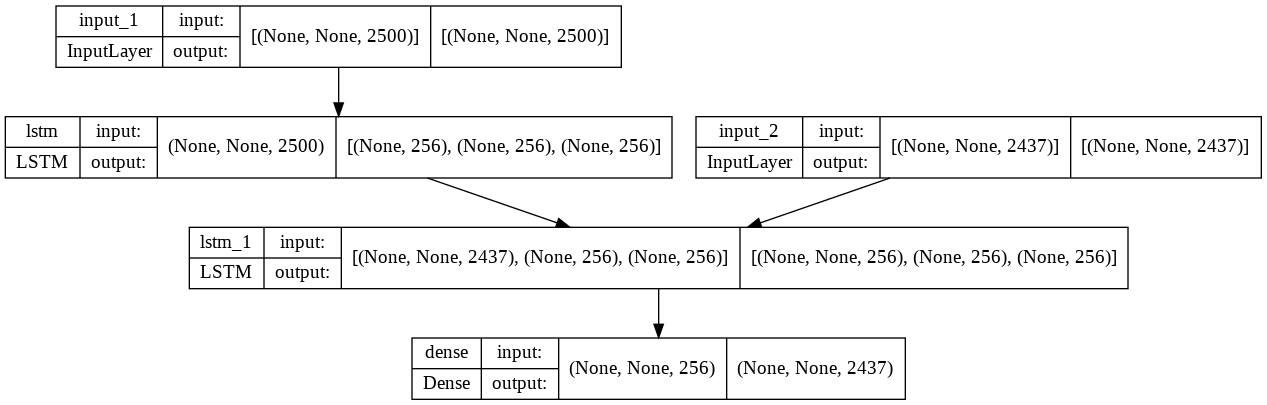

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
history = model.fit([encoder_input_data_downsampled, decoder_input_data_downsampled], decoder_output_data_downsampled,
                    batch_size=32, epochs=200, validation_split=0.15)

Epoch 1/200
133/133 [==============================] - 15s 56ms/step - loss: 1.5753 - accuracy: 0.0234 - val_loss: 1.4410 - val_accuracy: 0.0237
Epoch 2/200
133/133 [==============================] - 6s 42ms/step - loss: 1.5154 - accuracy: 0.0235 - val_loss: 1.4479 - val_accuracy: 0.0237
Epoch 3/200
133/133 [==============================] - 6s 42ms/step - loss: 1.5180 - accuracy: 0.0233 - val_loss: 1.4488 - val_accuracy: 0.0237
Epoch 4/200
133/133 [==============================] - 6s 42ms/step - loss: 1.5190 - accuracy: 0.0233 - val_loss: 1.4510 - val_accuracy: 0.0237
Epoch 5/200
133/133 [==============================] - 6s 44ms/step - loss: 1.5200 - accuracy: 0.0233 - val_loss: 1.4471 - val_accuracy: 0.0237
Epoch 6/200
133/133 [==============================] - 6s 42ms/step - loss: 1.5205 - accuracy: 0.0233 - val_loss: 1.4512 - val_accuracy: 0.0237
Epoch 7/200
133/133 [==============================] - 6s 43ms/step - loss: 1.5215 - accuracy: 0.0233 - val_loss: 1.4512 - val_accuracy